In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
from keras.layers import Dense, Flatten, Conv2D, Dropout

In [22]:
from keras import Sequential

In [4]:
letters = pd.read_csv('/content/slmnist.csv')

In [5]:
letters.head()

,letter,label,file,background
0,а,1,01_01.png,0
1,а,1,01_02.png,0
2,а,1,01_03.png,0
3,а,1,01_04.png,0
4,а,1,01_05.png,0


In [12]:
zeichen = list(np.unique(letters['letter']))

In [7]:
len(letters.letter.value_counts())

33

In [10]:
Index = np.arange(0,33)

In [13]:
normal_index= dict(zip(Index, zeichen))

In [15]:
reverse_index= dict(zip(Index, zeichen))

In [33]:
data_dir = '/content/sample_data'

In [25]:
from tqdm import tqdm
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [34]:
datax0=[]
for im in tqdm(os.listdir(data_dir)):
    image=load_img(os.path.join(data_dir,im), grayscale=False, color_mode='rgb', target_size=(48,48))
    image=img_to_array(image)
    image=image/255.0
    datax0.append(image)

  0%|          | 0/6 [00:00<?, ?it/s]


UnidentifiedImageError: ignored

In [4]:
letters = pd.read_csv('/content/slmnist.csv')

In [5]:
letters.head()

,1,142,143,146,148,149,149.1,149.2,150,151,...,0.1,15,55,63,37.2,61.1,77.2,65.1,38.1,23
0,0,141,142,144,145,147,149,150,151,152,...,173.0,179.0,179.0,180.0,181.0,181.0,182.0,182.0,183.0,183.0
1,1,156,157,160,162,164,166,169,171,171,...,181.0,197.0,195.0,193.0,193.0,191.0,192.0,198.0,193.0,182.0
2,3,63,26,65,86,97,106,117,123,128,...,175.0,179.0,180.0,182.0,183.0,183.0,184.0,185.0,185.0,185.0
3,1,156,160,164,168,172,175,178,180,182,...,108.0,107.0,106.0,110.0,111.0,108.0,108.0,102.0,84.0,70.0
4,0,159,163,167,168,170,173,175,178,178,...,173.0,233.0,235.0,235.0,236.0,235.0,235.0,236.0,235.0,235.0


In [27]:
letters['1'].value_counts()

3    439
1    436
2    435
0    416
Name: 1, dtype: int64

In [47]:
labels= pd.get_dummies(letters['1'])

In [48]:
labels[:3]

,0,1,2,3
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1


In [159]:
from tensorflow.keras.utils import to_categorical

In [16]:
letters2= letters.drop('1', axis=1).values

In [150]:
letters['1'] = pd.Categorical(letters['1'])

In [157]:
letters['1'] = letters['1'].cat.codes

In [161]:
labels = to_categorical(letters['1'])
labels.shape

(1726, 4)

In [7]:
letters2.shape

(1726, 784)

In [20]:
letters2 = letters2.reshape(1726, 28,28)

In [19]:
from sklearn.model_selection import train_test_split

In [162]:
X_train, X_test, y_train, y_test = train_test_split(letters2, labels, test_size=0.15)

In [24]:
np.shape(X_train)

(1467, 28, 28)

In [172]:
model = Sequential()

In [173]:
model.add(Conv2D(10, kernel_size=(3), activation='relu', input_shape=( 28,28,1)))

In [174]:
model.add(Flatten())

In [175]:
model.add(Dense(4, activation='softmax'))

In [176]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [168]:
from keras.callbacks import EarlyStopping

In [178]:
model.fit(X_train,y_train, epochs=15, batch_size=300, validation_split=0.2, callbacks=[stopper])

Epoch 1/15
4/4 [==============================] - 2s 299ms/step - loss: 69.0591 - accuracy: 0.2702 - val_loss: 80.7749 - val_accuracy: 0.2585
Epoch 2/15
4/4 [==============================] - 0s 119ms/step - loss: 48.0311 - accuracy: 0.2916 - val_loss: 28.4698 - val_accuracy: 0.2857
Epoch 3/15
4/4 [==============================] - 0s 85ms/step - loss: 27.9276 - accuracy: 0.3291 - val_loss: 28.8583 - val_accuracy: 0.2959
Epoch 4/15
4/4 [==============================] - 0s 99ms/step - loss: 20.5584 - accuracy: 0.3248 - val_loss: 5.3143 - val_accuracy: 0.5204
Epoch 5/15
4/4 [==============================] - 0s 120ms/step - loss: 4.4553 - accuracy: 0.5789 - val_loss: 4.5043 - val_accuracy: 0.6871
Epoch 6/15
4/4 [==============================] - 1s 139ms/step - loss: 4.5578 - accuracy: 0.6070 - val_loss: 3.3938 - val_accuracy: 0.6156
Epoch 7/15
4/4 [==============================] - 1s 134ms/step - loss: 1.3633 - accuracy: 0.7988 - val_loss: 0.6928 - val_accuracy: 0.8741
Epoch 8/15
4/4 

In [59]:
sample = X_test[0]

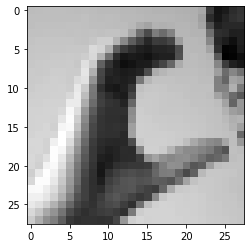

In [60]:
plt.imshow(sample, cmap='gray')

In [93]:
Kernel = np.array([[1,-1,0], [1,-1,0], [1,-1,0]])

In [94]:
conv= np.zeros((28,28))

In [105]:
sample[28,:] = 0

IndexError: ignored

In [98]:
sample2 = sample[:,-1+1]=0

In [106]:
for r in range(sample.shape[0]-3):
  for c in range(sample.shape[1]-3):
    conv[r,c] = (sample[r:r+3, c:c+3] * Kernel).sum()

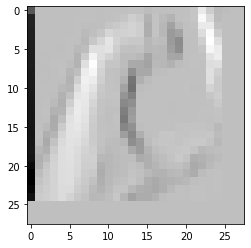

In [107]:
plt.imshow(conv, cmap='gray')

In [110]:
from sklearn.preprocessing import MinMaxScaler

In [111]:
scaler= MinMaxScaler()

In [112]:
sample2 = scaler.fit_transform(sample)

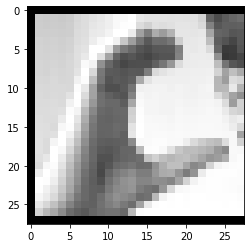

In [114]:
plt.imshow(sample2, cmap='gray')

In [132]:
Kernel2= [[1.0,0,0], [1.0,0,0], [1.0,0,0]]

In [133]:
conv2 = np.zeros((28,28))

In [134]:
for r in range(sample2.shape[0]-3):
  for c in range(sample2.shape[0]-3):
    conv2[r,c] = (sample2[r:r+3,c:c+3] * Kernel2).sum()

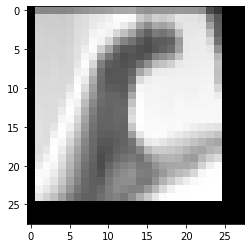

In [135]:
plt.imshow(conv2,cmap='gray')

In [149]:
y_test[:3]

,0,1,2,3
651,0,0,1,0
647,0,1,0,0
842,1,0,0,0


In [146]:
stopper= EarlyStopping(patience=3, monitor='val_loss')

In [215]:
model2 = Sequential()

In [216]:
model2.add(Conv2D(15, kernel_size=(3), activation='relu', input_shape=(28,28,1), padding='same', dilation_rate=2))

In [217]:
model2.add(Conv2D(10, kernel_size=(3), activation='relu', padding='same', dilation_rate=2))

In [218]:
model2.add(Conv2D(8, kernel_size=(3), activation='relu', padding='same'))

In [219]:
model2.add(Conv2D(5, kernel_size=(3), activation='relu', padding='same'))

In [220]:
model2.add(Flatten())

In [221]:
model2.add(Dense(4, activation='softmax'))

In [222]:
model2.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [223]:
model2.fit(X_train, y_train, epochs=15, batch_size=600, validation_split=0.2, callbacks=[stopper])

Epoch 1/15
2/2 [==============================] - 5s 2s/step - loss: 9.1261 - accuracy: 0.2430 - val_loss: 13.7163 - val_accuracy: 0.2653
Epoch 2/15
2/2 [==============================] - 3s 1s/step - loss: 10.4625 - accuracy: 0.3223 - val_loss: 5.5009 - val_accuracy: 0.4116
Epoch 3/15
2/2 [==============================] - 3s 1s/step - loss: 5.1344 - accuracy: 0.4194 - val_loss: 3.6084 - val_accuracy: 0.4218
Epoch 4/15
2/2 [==============================] - 4s 2s/step - loss: 2.9571 - accuracy: 0.4186 - val_loss: 1.2076 - val_accuracy: 0.5238
Epoch 5/15
2/2 [==============================] - 2s 1s/step - loss: 1.0709 - accuracy: 0.5737 - val_loss: 1.2325 - val_accuracy: 0.5306
Epoch 6/15
2/2 [==============================] - 3s 1s/step - loss: 1.1915 - accuracy: 0.5320 - val_loss: 1.2824 - val_accuracy: 0.5374
Epoch 7/15
2/2 [==============================] - 2s 1s/step - loss: 1.0892 - accuracy: 0.6010 - val_loss: 0.8398 - val_accuracy: 0.6633
Epoch 8/15
2/2 [=======================

In [213]:
model2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.8958


[nan, 0.8957529067993164]

In [214]:
model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 14, 14, 15)        150       
                                                                 
 conv2d_21 (Conv2D)          (None, 7, 7, 10)          1360      
                                                                 
 conv2d_22 (Conv2D)          (None, 4, 4, 8)           728       
                                                                 
 conv2d_23 (Conv2D)          (None, 2, 2, 5)           365       
                                                                 
 flatten_8 (Flatten)         (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 4)                 84        
                                                                 
Total params: 2,687
Trainable params: 2,687
Non-train